# Tutorial: Morphology Functions

https://plantcv.readthedocs.io/en/stable/morphology_tutorial/

In [1]:
import os
import numpy as np
import cv2 as cv
from skimage.morphology import skeletonize
import matplotlib.pyplot as plt
from skimage.util import invert
import PIL.Image as pilimg
from plantcv import plantcv as pcv

# Mask Image

the image with 0 or 1

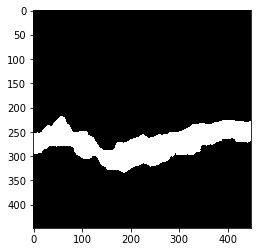

In [2]:
exp_img_path = '/home/jovyan/work/hangman/dataset/crack_segmentation_dataset/masks/DeepCrack_11301-4.jpg'

# im = pilimg.open(exp_img_path)
im = cv.imread(exp_img_path, cv.IMREAD_GRAYSCALE)

pix = im/255
pix = np.where(pix>0.5,255,0)
pix = pix.astype(np.uint8)

# plt.figure(figsize = (10,10))
plt.imshow(pix, cmap='gray')

# Skeletonized Image

Skeleton takes only a binary object.

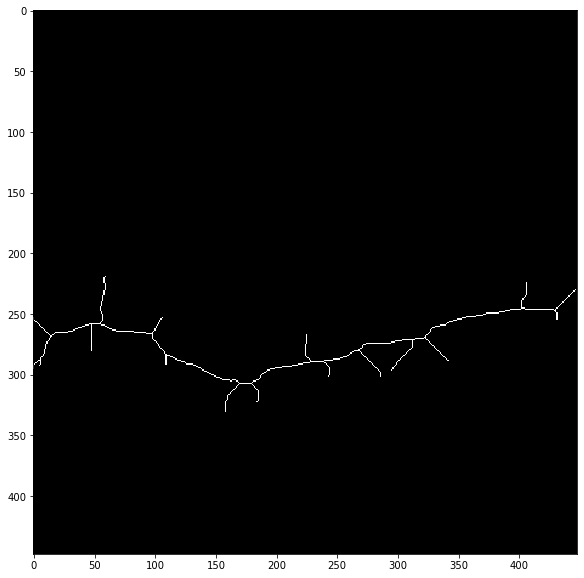

In [3]:
# Skeletonize the mask 

# Inputs:
#   mask = Binary image data

skeleton = pcv.morphology.skeletonize(mask=pix)
plt.figure(figsize = (10,10))
plt.imshow(skeleton, cmap='gray')

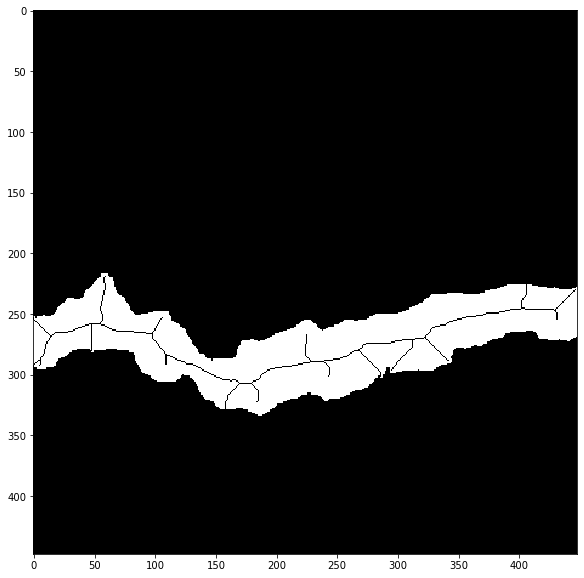

In [4]:
plt.figure(figsize = (10,10))
plt.imshow(pix-skeleton, cmap='gray')

# Pruned Image

The function returns a pruned skeleton but the image that gets plot for debugging shows the portions of skeleton that get pruned off.

In [17]:
# Set global debug behavior to None (default), "print" (to file), 
# or "plot" (Jupyter Notebooks or X11)


pruned, seg_img, edge_objects = pcv.morphology.prune(skel_img=skeleton, size=100)

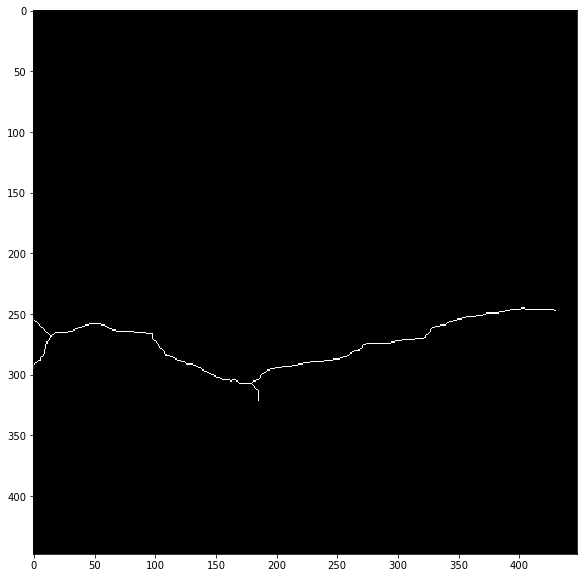

In [18]:
plt.figure(figsize = (10,10))
plt.imshow(pruned, cmap='gray')

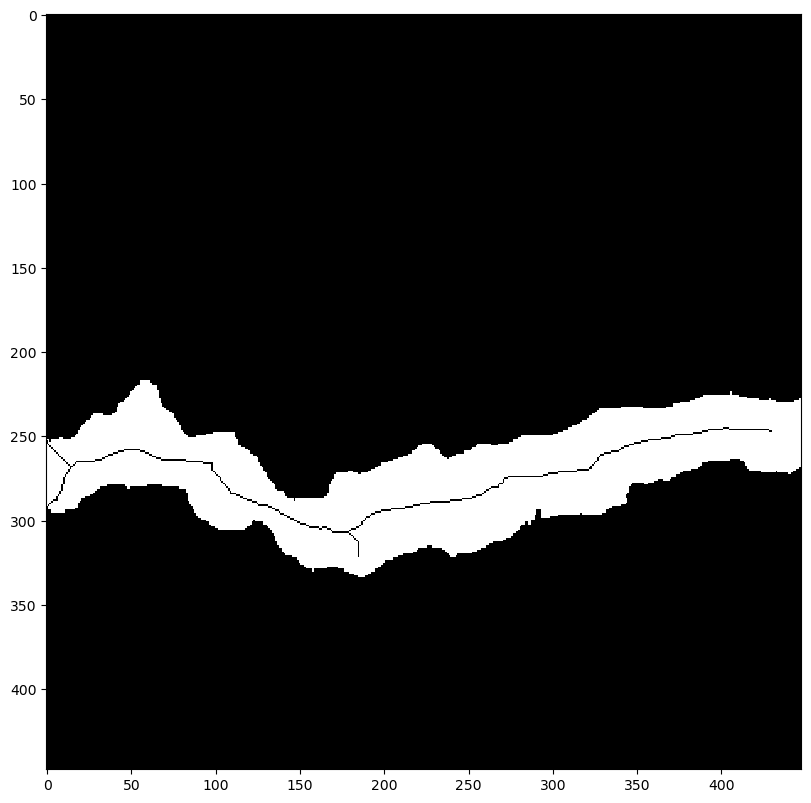

In [104]:
plt.figure(figsize = (10,10))
plt.imshow(pix-pruned, cmap='gray')

# Branch Points

This function returns a binary mask, where the white pixels are the branch points identified.

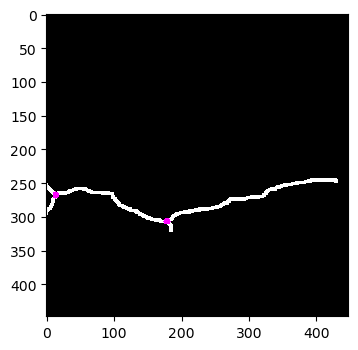

In [80]:
# Identify branch points   

# Inputs:
#   skel_img = Skeletonized image
#   mask     = (Optional) binary mask for debugging. If provided, debug image will be overlaid on the mask.

branch_pts_mask = pcv.morphology.find_branch_pts(skel_img=pruned, mask=None)

# Tip Points

This function also returns a binary mask of tip points identified.

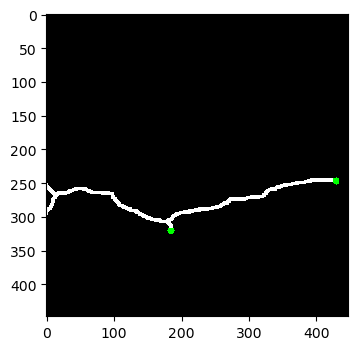

In [81]:
# Identify tip points   

# Inputs:
#   skel_img = Skeletonized image
#   mask     = (Optional) binary mask for debugging. If provided, debug image will be overlaid on the mask.

tip_pts_mask = pcv.morphology.find_tips(skel_img=pruned, mask=None)

# Sorted Segments

Function sorts pieces of the skeleton into leaf and "other". It returns the leaf objects separate from the stem objects, and their corresponding hierarchies.

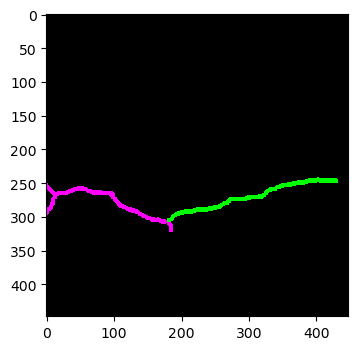

In [85]:
# Sort segments into leaf objects and stem objects  

# Inputs:
#   skel_img  = Skeletonized image
#   objects   = List of contours
#   mask      = (Optional) binary mask for debugging. If provided, debug image will be overlaid on the mask.

leaf_obj, stem_obj = pcv.morphology.segment_sort(skel_img=pruned, 
                                                 objects=edge_objects,
                                                 mask=None)

# Identify Segments

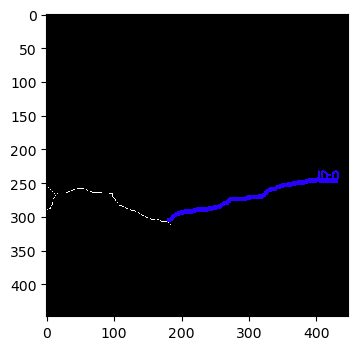

In [86]:
# Identify segments     

# Inputs:
#   skel_img  = Skeletonized image
#   objects   = List of contours
#   mask      = (Optional) binary mask for debugging. If provided, debug image will be overlaid on the mask.

segmented_img, labeled_img = pcv.morphology.segment_id(skel_img=pruned,
                                                       objects=leaf_obj,
                                                       mask=None)

# Find Leaf Path Lengths

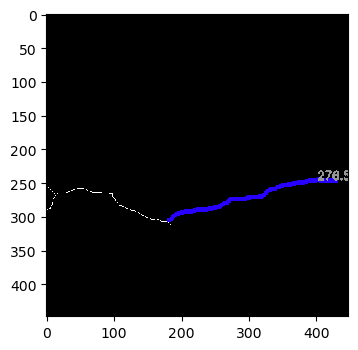

In [87]:
# Measure path lengths of segments     

# Inputs:
#   segmented_img = Segmented image to plot lengths on
#   objects       = List of contours

labeled_img  = pcv.morphology.segment_path_length(segmented_img=segmented_img, 
                                                  objects=leaf_obj)

# Find Leaf Euclidean Distance

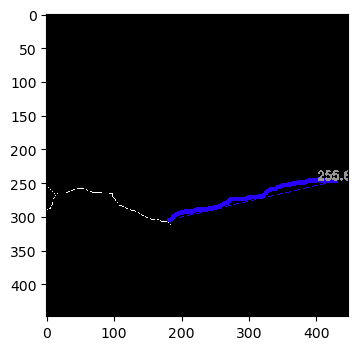

In [88]:
# Measure euclidean distance of segments      

# Inputs:
#   segmented_img = Segmented image to plot lengths on
#   objects       = List of contours

labeled_img = pcv.morphology.segment_euclidean_length(segmented_img=segmented_img, 
                                                      objects=leaf_obj)

# Find Leaf Curvature

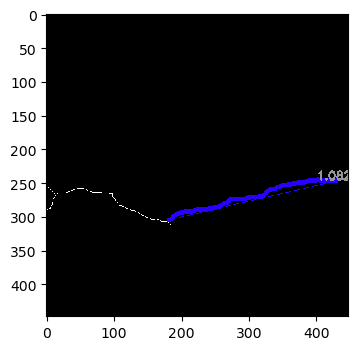

In [89]:
# Measure curvature of segments      

# Inputs:
#   segmented_img = Segmented image to plot curvature on
#   objects       = List of contours

labeled_img = pcv.morphology.segment_curvature(segmented_img=segmented_img, 
                                               objects=leaf_obj)

# Find Leaf Angles

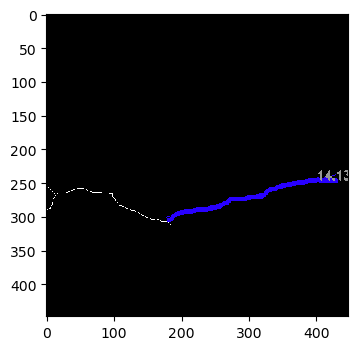

In [90]:
# Measure the angle of segments      

# Inputs:
#   segmented_img = Segmented image to plot angles on
#   objects       = List of contours

labeled_img = pcv.morphology.segment_angle(segmented_img=segmented_img, 
                                           objects=leaf_obj)

# Find Leaf Tangent Angles

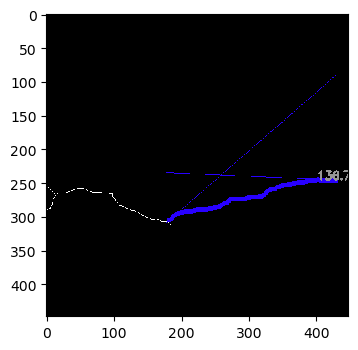

In [91]:
# Inputs:
#   segmented_img = Segmented image to plot tangent angles on
#   objects       = List of contours
#   size          = Size of ends used to calculate "tangent" lines

labeled_img = pcv.morphology.segment_tangent_angle(segmented_img=segmented_img, 
                                                   objects=leaf_obj, size=15)

# Find Leaf Insertion Angles

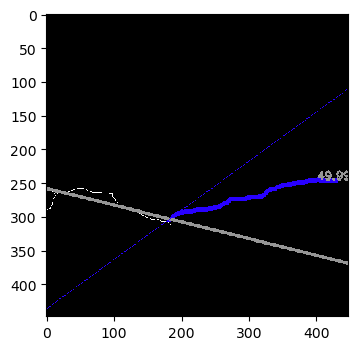

In [92]:
# Measure the leaf insertion angles      

# Inputs:
#   skel_img         = Skeletonize image 
#   segmented_img    = Segmented image to plot insertion angles on
#   leaf_objects     = List of leaf contours
#   stem_objects     = List of stem objects 
#   size             = Size of the inner portion of each leaf to find a linear regression line

labeled_img = pcv.morphology.segment_insertion_angle(skel_img=pruned,
                                                     segmented_img=segmented_img, 
                                                     leaf_objects=leaf_obj, 
                                                     stem_objects=stem_obj,
                                                     size=20)